In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/titanic/gender_submission.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/train.csv


In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor


file_path = '/kaggle/input/titanic/train.csv'

titanic_data = pd.read_csv('/kaggle/input/titanic/train.csv')

titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
train = pd.read_csv('/kaggle/input/titanic/train.csv')
test = pd.read_csv('/kaggle/input/titanic/test.csv')

train.describe(include="all")








,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Braund, Mr. Lewis Richard",male,NaN,NaN,NaN,1601,NaN,C23 C25 C27,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


In [4]:
print(train.columns)

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


In [5]:
train.sample(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
100,101,0,3,"Petranec, Miss. Matilda",female,28.0,0,0,349245,7.8958,NaN,S
303,304,1,2,"Keane, Miss. Nora A",female,NaN,0,0,226593,12.3500,E101,Q
365,366,0,3,"Adahl, Mr. Mauritz Nils Martin",male,30.0,0,0,C 7076,7.2500,NaN,S
584,585,0,3,"Paulner, Mr. Uscher",male,NaN,0,0,3411,8.7125,NaN,C
639,640,0,3,"Thorneycroft, Mr. Percival",male,NaN,1,0,376564,16.1000,NaN,S


In [6]:
train.describe(include = "all")

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Braund, Mr. Lewis Richard",male,NaN,NaN,NaN,1601,NaN,C23 C25 C27,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


In [7]:
print(pd.isnull(train).sum())


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


Percentage of females who survived: 74.20382165605095
Percentage of males who survived: 18.890814558058924


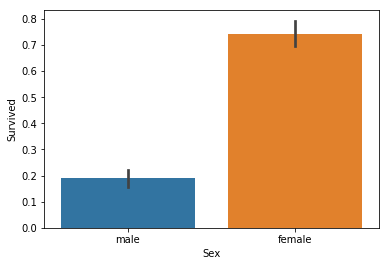

In [8]:
sns.barplot(x="Sex", y="Survived", data=train)

print("Percentage of females who survived:", train["Survived"][train["Sex"] == 'female'].value_counts(normalize = True)[1]*100)

print("Percentage of males who survived:", train["Survived"][train["Sex"] == 'male'].value_counts(normalize = True)[1]*100)


Pclass 1 survival percentage: 62.96296296296296
Pclass 2 survival percentage: 47.28260869565217
Pclass 3 survival percentage: 24.236252545824847


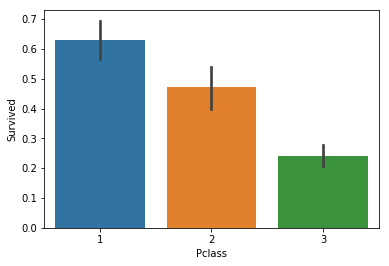

In [9]:
sns.barplot(x ="Pclass", y="Survived", data=train)
print("Pclass 1 survival percentage:",train["Survived"][train["Pclass"] == 1].value_counts(normalize=True)[1]*100)
print("Pclass 2 survival percentage:",train["Survived"][train["Pclass"] == 2].value_counts(normalize=True)[1]*100)
print("Pclass 3 survival percentage:",train["Survived"][train["Pclass"] == 3].value_counts(normalize=True)[1]*100)

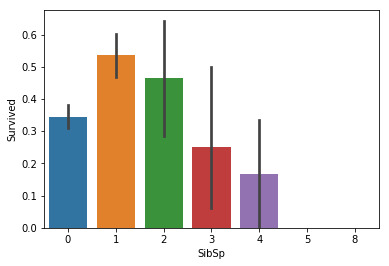

In [10]:
sns.barplot(x="SibSp", y="Survived", data=train)



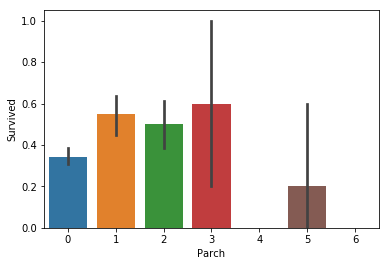

In [11]:
sns.barplot(x="Parch",y="Survived",data=train)
plt.show()

In [12]:
train["Age"] = train["Age"].fillna(-0.5)
test["Age"] = test["Age"].fillna(-0.5)

In [13]:
train = train.drop(["Cabin"], axis =1)
test = test.drop(["Cabin"], axis =1)





In [14]:
train = train.drop(["Ticket"], axis =1)
test = test.drop(["Ticket"], axis =1)

In [15]:
train = train.fillna({"Embarked": "S"})
test = test.fillna({"Embarked": "S"})

train = train.fillna({"Fare": 0})
test = test.fillna({"Fare": 0})

In [16]:
train.sample(20)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
531,532,0,3,"Toufik, Mr. Nakli",male,-0.5,0,0,7.2292,C
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,-0.5,1,2,23.4500,S
216,217,1,3,"Honkanen, Miss. Eliina",female,27.0,0,0,7.9250,S
302,303,0,3,"Johnson, Mr. William Cahoone Jr",male,19.0,0,0,0.0000,S
121,122,0,3,"Moore, Mr. Leonard Charles",male,-0.5,0,0,8.0500,S
97,98,1,1,"Greenfield, Mr. William Bertram",male,23.0,0,1,63.3583,C
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,30.0708,C
228,229,0,2,"Fahlstrom, Mr. Arne Jonas",male,18.0,0,0,13.0000,S
547,548,1,2,"Padro y Manent, Mr. Julian",male,-0.5,0,0,13.8625,C
295,296,0,1,"Lewy, Mr. Ervin G",male,-0.5,0,0,27.7208,C


In [17]:
sex_mapping = {"male": 0, "female": 1}
train["Sex"] = train["Sex"].map(sex_mapping)
test["Sex"] = test["Sex"].map(sex_mapping)
train.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,8.0500,S


In [18]:
train = train.drop(["Name"], axis = 1)
test = test.drop(["Name"], axis = 1)



In [19]:
embarked_mapping = {"S": 1, "C": 2, "Q": 3}
train["Embarked"] = train["Embarked"].map(embarked_mapping)
test["Embarked"] = test["Embarked"].map(embarked_mapping)
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,0,22.0,1,0,7.2500,1
1,2,1,1,1,38.0,1,0,71.2833,2
2,3,1,3,1,26.0,0,0,7.9250,1
3,4,1,1,1,35.0,1,0,53.1000,1
4,5,0,3,0,35.0,0,0,8.0500,1


In [20]:
from sklearn.model_selection import train_test_split

predictors = train.drop(["Survived", "PassengerId"], axis=1)
target = train["Survived"]
test_data = test.drop(["PassengerId"], axis=1)

x_train, x_val, y_train, y_val = train_test_split(predictors, target, random_state = 0)

In [21]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

decisiontree = DecisionTreeClassifier()
decisiontree.fit(x_train, y_train)
pred = decisiontree.predict(x_val)
acc_decisiontree = round(accuracy_score(pred, y_val) * 100, 2)

print(acc_decisiontree)







82.06


In [22]:
test_pred = decisiontree.predict(test_data)
#test_accuracy = round(accuracy_score(test_pred,y_val ) * 100, 2)

In [23]:
ids = test["PassengerId"]
output = pd.DataFrame({'PassengerId': ids, 'Survived': test_pred })
output.to_csv('submission.csv', index=False)
print('File Saved')

/opt/conda/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/opt/conda/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/opt/conda/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/opt/conda/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:519: FutureWarning: Passing (type, 1) or 

File Saved


In [24]:
output.dtypes

PassengerId    int64
Survived       int64
dtype: object

In [25]:
test_data.sample(40)

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
201,3,0,0.33,0,2,14.4000,1
315,3,1,17.00,0,0,7.7333,3
52,2,1,20.00,2,1,23.0000,1
1,3,1,47.00,1,0,7.0000,1
300,3,0,32.00,0,0,7.7750,1
219,3,0,-0.50,0,0,8.0500,1
220,2,1,30.00,1,0,13.8583,2
108,3,0,-0.50,0,0,8.7125,1
64,1,0,13.00,2,2,262.3750,2
403,1,0,17.00,0,0,47.1000,1
